# Janata Hack : Mobility Analytics

Importing all the relevant libraries.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the train and test dataset.

In [2]:
os.chdir(r"C:\Users\**\Desktop\SAP_laptop_backup\Desktop\AIML\Janatahack4")
data_train = pd.read_csv("train_Wc8LBpr.csv")
data_test = pd.read_csv("test_VsU9xXK.csv")

Here I have combined the train and test dataset for preprocessing and visualizing the data.

In [3]:
combine = pd.concat([data_train,data_test],ignore_index=True, sort=False)

Looking into the data set for missing/Null values. There are a lot of variables with Null values which need to handled before modeling. We will be handling null values as we go further visualizing all the variables.

In [4]:
null_dict={}
for col in combine.columns:
    null_dict[col] = combine[col].isnull().sum()

In [5]:
print(null_dict)

{'Trip_ID': 0, 'Trip_Distance': 0, 'Type_of_Cab': 33368, 'Customer_Since_Months': 9886, 'Life_Style_Index': 33520, 'Confidence_Life_Style_Index': 33520, 'Destination_Type': 0, 'Customer_Rating': 0, 'Cancellation_Last_1Month': 0, 'Var1': 117819, 'Var2': 0, 'Var3': 0, 'Gender': 0, 'Surge_Pricing_Type': 87395}


### Visualizing the data. 

The dataset consists of 13 independent variables. The target variable Surge_Pricing_Type has 3 classes(1,2,3). 

In [6]:
data_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


TRIP DISTANCE

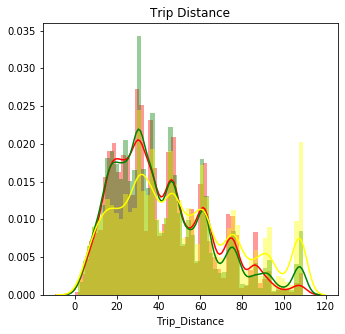

In [7]:
data1=data_train.loc[data_train["Surge_Pricing_Type"]==1]
data2=data_train.loc[data_train["Surge_Pricing_Type"]==2]
data3=data_train.loc[data_train["Surge_Pricing_Type"]==3]
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Trip_Distance"],color="red")
sns.distplot(data2["Trip_Distance"],color="green")
sns.distplot(data3["Trip_Distance"],color="yellow")
plt.title("Trip Distance")
plt.show()

In [8]:
data_train["Surge_Pricing_Type"].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [9]:
data_train.shape

(131662, 14)

In [10]:
data_test.shape

(87395, 13)

In [11]:
combine.shape

(219057, 14)

In [12]:
combine["Surge_Pricing_Type"].isnull().sum()

87395

TYPE OF CAB

In [14]:
combine["Type_of_Cab"].value_counts()

B    51585
C    46732
A    35878
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

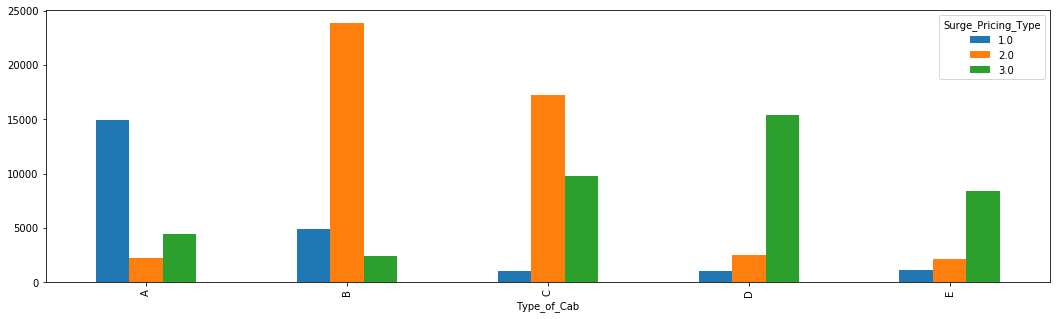

In [15]:
combine.groupby("Surge_Pricing_Type").Type_of_Cab.value_counts().unstack(0).plot.bar()

CUSTOMER SINCE MONTHS

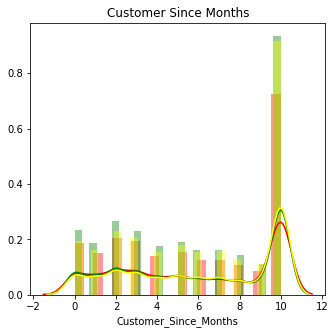

In [16]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Customer_Since_Months"],color="red")
sns.distplot(data2["Customer_Since_Months"],color="green")
sns.distplot(data3["Customer_Since_Months"],color="yellow")
plt.title("Customer Since Months")
plt.show()

We can see that the trip distance is left skewed.Also 10 months being the most dominant value and the maximum value shows that the operations started 10 months ago only and these all are initial customers. 

I have manually created bins for this.

In [17]:
custmon =[]
for i in range(len(combine)):
    if combine["Customer_Since_Months"][i] ==10.0:
        custmon.append("Ten")
    elif combine["Customer_Since_Months"][i]>=7.0:
        custmon.append("7to9")
    elif combine["Customer_Since_Months"][i]>=4.0:
        custmon.append("4to6")
    elif combine["Customer_Since_Months"][i]>=0.0:
        custmon.append("0to3")
    else:
        custmon.append(combine["Customer_Since_Months"][i])

In [18]:
combine["Customer_Since_Months"]=custmon

In [19]:
combine["Customer_Since_Months"].isnull().sum()

9886

Plotting the bar graph for the bins created for Customer Since Months.

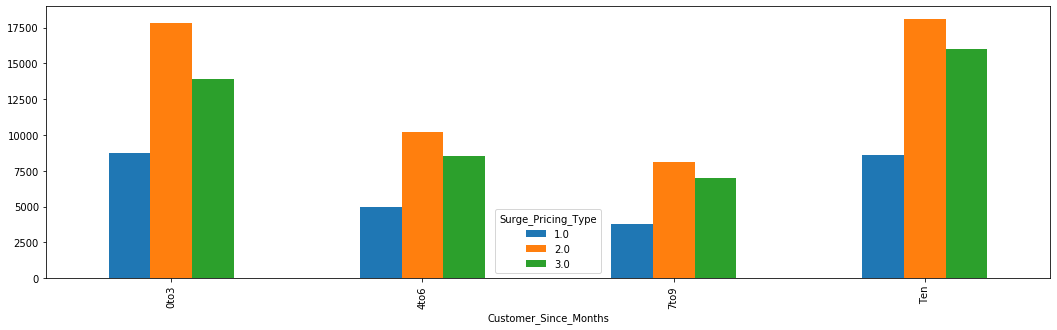

In [20]:
combine.groupby("Surge_Pricing_Type").Customer_Since_Months.value_counts().unstack(0).plot.bar()

LIFE STYLE INDEX

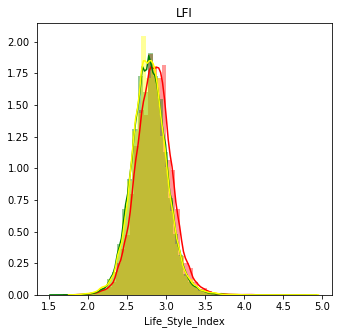

In [21]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Life_Style_Index"],color="red")
sns.distplot(data2["Life_Style_Index"],color="green")
sns.distplot(data3["Life_Style_Index"],color="yellow")
plt.title("LFI")
plt.show()

In [22]:
combine["Life_Style_Index"].describe()

count    185537.000000
mean          2.802594
std           0.226323
min           1.317850
25%           2.654620
50%           2.798280
75%           2.947650
max           4.875110
Name: Life_Style_Index, dtype: float64

Filling the Null values with the mean for Life Style Index

In [23]:
combine["Life_Style_Index"].fillna(np.mean(combine["Life_Style_Index"]),inplace=True)

In [24]:
combine["Life_Style_Index"].isnull().sum()

0

CONFIDENCE LIFE STYLE INDEX

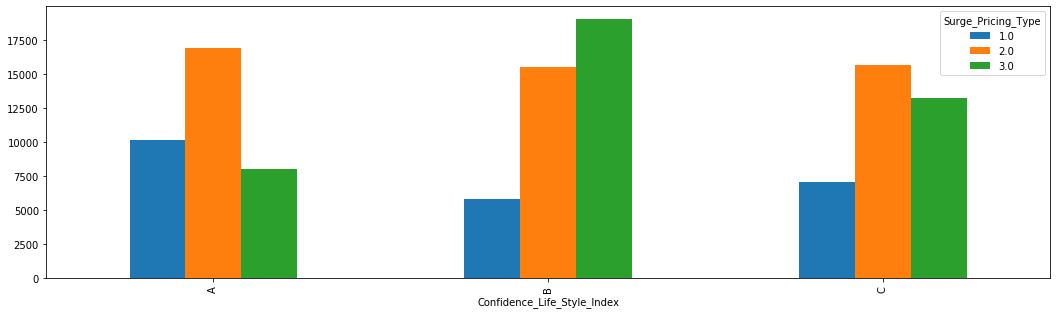

In [25]:
combine.groupby("Surge_Pricing_Type").Confidence_Life_Style_Index.value_counts().unstack(0).plot.bar()

DESTINATION TYPE VALUE COUNTS

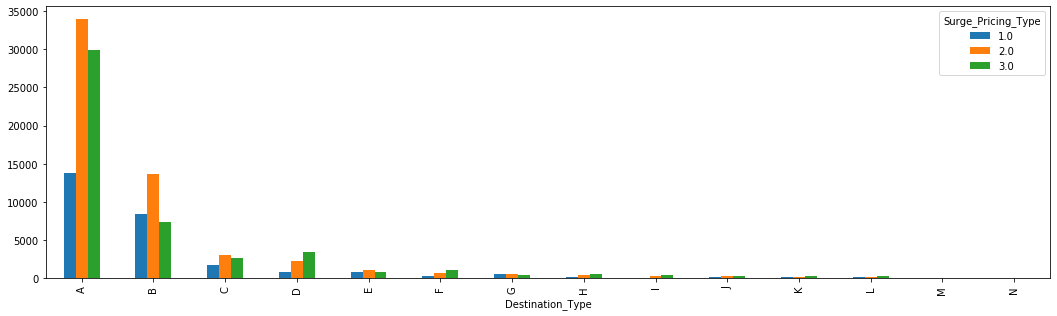

In [26]:
combine.groupby("Surge_Pricing_Type").Destination_Type.value_counts().unstack(0).plot.bar()

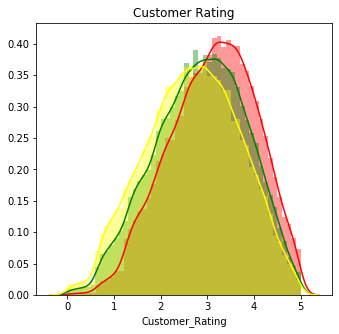

In [27]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Customer_Rating"],color="red")
sns.distplot(data2["Customer_Rating"],color="green")
sns.distplot(data3["Customer_Rating"],color="yellow")
plt.title("Customer Rating")
plt.show()

CANCELLATION LAST 1 MONTH

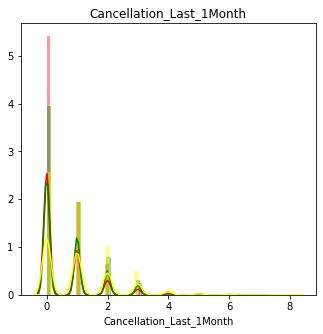

In [28]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Cancellation_Last_1Month"],color="red")
sns.distplot(data2["Cancellation_Last_1Month"],color="green")
sns.distplot(data3["Cancellation_Last_1Month"],color="yellow")
plt.title("Cancellation_Last_1Month")
plt.show()

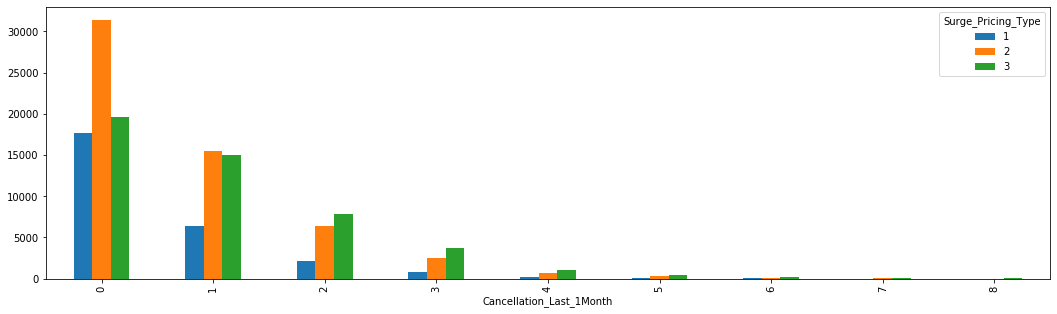

In [29]:
data_train.groupby("Surge_Pricing_Type").Cancellation_Last_1Month.value_counts().unstack(0).plot.bar()

VAR1

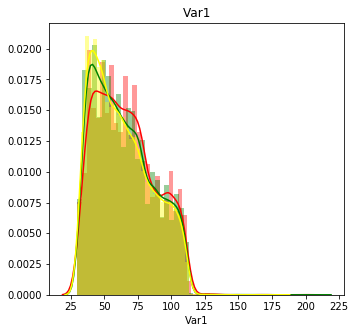

In [30]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Var1"],color="red")
sns.distplot(data2["Var1"],color="green")
sns.distplot(data3["Var1"],color="yellow")
plt.title("Var1")
plt.show()

Log transformation of Var1 shows better distribution. Hence applying the log transformation for Var1.

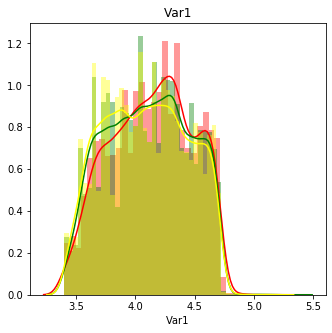

In [31]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(np.log(data1["Var1"]),color="red")
sns.distplot(np.log(data2["Var1"]),color="green")
sns.distplot(np.log(data3["Var1"]),color="yellow")
plt.title("Var1")
plt.show()

In [32]:
combine["Var1"]=np.log(combine["Var1"])

In [33]:
combine["Var1"].describe()

count    101238.000000
mean          4.102318
std           0.343096
min           3.401197
25%           3.828641
50%           4.110874
75%           4.369448
max           5.347108
Name: Var1, dtype: float64

Also it is observed that Var1 has almost 50% missing values, hence filling the null values with mean of Var1.

In [34]:
combine["Var1"].fillna(np.mean(combine["Var1"]),inplace=True)

In [35]:
combine["Var1"].isnull().sum()

0

VAR2

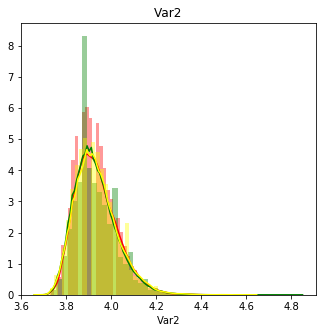

In [36]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(np.log(data1["Var2"]),color="red")
sns.distplot(np.log(data2["Var2"]),color="green")
sns.distplot(np.log(data3["Var2"]),color="yellow")
plt.title("Var2")
plt.show()

VAR3

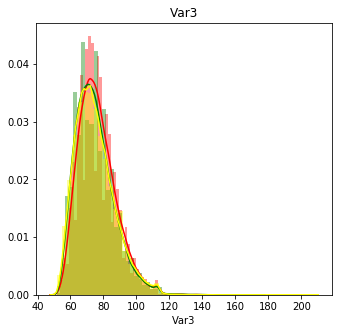

In [37]:
plt.rcParams['figure.figsize']=(18,5)
plt.subplot(1,3,1)
sns.distplot(data1["Var3"],color="red")
sns.distplot(data2["Var3"],color="green")
sns.distplot(data3["Var3"],color="yellow")
plt.title("Var3")
plt.show()

GENDER

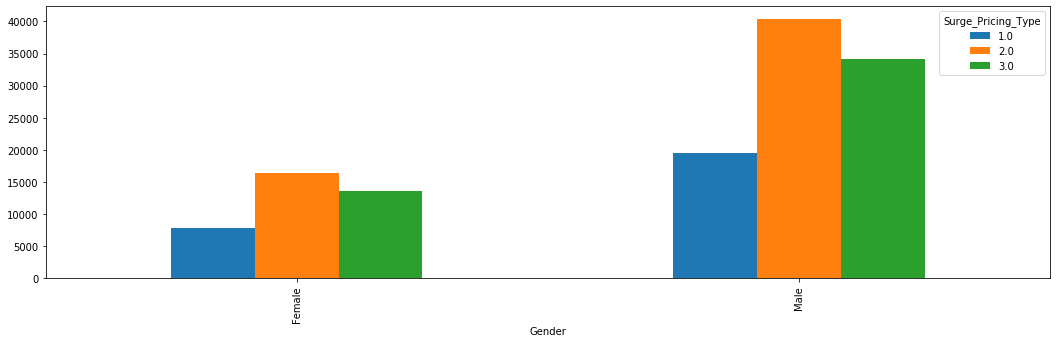

In [38]:
combine.groupby("Surge_Pricing_Type").Gender.value_counts().unstack(0).plot.bar()

As we have already filled NULL values for all the continuous variables with the mean of the same, we are left with NULL values for categorial variables.First I had tried filling the Null values by predicting them using kmeans but that did not provide better results so alternatively I have created a different class "UNKNOWN" for all the missing variables which helped improve the results.

In [39]:
missing_val ={}
missing_val_idx={}
cols = list(combine.columns)
for col in cols:
    missing_val[col]=combine[col].isna().sum()
    missing_val_idx[col]= list(combine.loc[combine[col].isna()].index)

In [40]:
print(missing_val)

{'Trip_ID': 0, 'Trip_Distance': 0, 'Type_of_Cab': 33368, 'Customer_Since_Months': 9886, 'Life_Style_Index': 0, 'Confidence_Life_Style_Index': 33520, 'Destination_Type': 0, 'Customer_Rating': 0, 'Cancellation_Last_1Month': 0, 'Var1': 0, 'Var2': 0, 'Var3': 0, 'Gender': 0, 'Surge_Pricing_Type': 87395}


In [41]:
combine1 = combine.drop(columns=["Trip_ID","Surge_Pricing_Type"])

In [42]:
'''from sklearn.neighbors import KNeighborsClassifier
def getmissingval(X_train,Y_train,X_mis):
    model = KNeighborsClassifier()
    model.fit(X_train,Y_train)
    Y_mis=model.predict(X_mis)
    return Y_mis

cols1 = ["Customer_Since_Months","Type_of_Cab","Confidence_Life_Style_Index"]

for col in cols1:
    X_mis = combine1.loc[missing_val_idx[col]]
    X_train = combine1.drop(missing_val_idx[col])
    Y_train = X_train[col]
    X_train = X_train.drop(columns=[col])
    X_train = pd.get_dummies(X_train)
    X_mis = X_mis.drop(columns=[col])
    X_mis = pd.get_dummies(X_mis)
    Y_mis = getmissingval(X_train,Y_train,X_mis)
    for i in range(missing_val[col]):
        combine1[col][missing_val_idx[col][i]]=Y_mis[i]
'''

'from sklearn.neighbors import KNeighborsClassifier\ndef getmissingval(X_train,Y_train,X_mis):\n    model = KNeighborsClassifier()\n    model.fit(X_train,Y_train)\n    Y_mis=model.predict(X_mis)\n    return Y_mis\n\ncols1 = ["Customer_Since_Months","Type_of_Cab","Confidence_Life_Style_Index"]\n\nfor col in cols1:\n    X_mis = combine1.loc[missing_val_idx[col]]\n    X_train = combine1.drop(missing_val_idx[col])\n    Y_train = X_train[col]\n    X_train = X_train.drop(columns=[col])\n    X_train = pd.get_dummies(X_train)\n    X_mis = X_mis.drop(columns=[col])\n    X_mis = pd.get_dummies(X_mis)\n    Y_mis = getmissingval(X_train,Y_train,X_mis)\n    for i in range(missing_val[col]):\n        combine1[col][missing_val_idx[col][i]]=Y_mis[i]\n'

In [43]:
cols1 = ["Customer_Since_Months","Type_of_Cab","Confidence_Life_Style_Index"]

for col in cols1:
    combine1[col] = combine1[col].fillna("Unknown")

In [44]:
#combine1.dtypes
cols = ["Type_of_Cab","Customer_Since_Months","Confidence_Life_Style_Index","Destination_Type","Gender"]
for col in cols:
    combine1[col]=combine1[col].astype("category")

In [45]:
combine1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,6.77,B,0to3,2.427690,A,A,3.90500,0,3.688879,46,60,Female
1,29.47,B,Ten,2.782450,B,A,3.45000,0,3.637586,56,78,Male
2,41.58,Unknown,Ten,2.802594,Unknown,E,3.50125,2,4.102318,56,77,Male
3,61.56,C,Ten,2.802594,Unknown,A,3.45375,0,4.102318,52,74,Male
4,54.95,C,Ten,3.034530,B,A,3.40250,4,3.931826,49,102,Male


In [46]:
combine.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,0to3,2.427690,A,A,3.90500,0,3.688879,46,60,Female,2.0
1,T0005689461,29.47,B,Ten,2.782450,B,A,3.45000,0,3.637586,56,78,Male,2.0
2,T0005689464,41.58,NaN,Ten,2.802594,NaN,E,3.50125,2,4.102318,56,77,Male,2.0
3,T0005689465,61.56,C,Ten,2.802594,NaN,A,3.45375,0,4.102318,52,74,Male,3.0
4,T0005689467,54.95,C,Ten,3.034530,B,A,3.40250,4,3.931826,49,102,Male,2.0


In [47]:
combine1["Trip_ID"] = combine["Trip_ID"]
combine1["Surge_Pricing_Type"] = combine["Surge_Pricing_Type"]

In [48]:
combine1.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months          category
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
Trip_ID                          object
Surge_Pricing_Type              float64
dtype: object

Separating the test and train data from combined data frame. 

In [49]:
data_test = combine1[combine1["Surge_Pricing_Type"].isnull()]

In [50]:
data_test = data_test.drop(columns=["Surge_Pricing_Type","Trip_ID"])

In [51]:
data_train = combine1[combine1["Surge_Pricing_Type"].notna()]

In [52]:
data_train["Surge_Pricing_Type"] = data_train["Surge_Pricing_Type"].astype("int")

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data_train.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months          category
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
Trip_ID                          object
Surge_Pricing_Type                int32
dtype: object

#### Model

Importing K Fold validation and Lightgbm gradient boosting libraries. Also as lightgbm and XGBoost take numeric inputs so we have to create dummy variables for all the categorical variables before modeling.

In [54]:
#Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import lightgbm as lgb

Y = data_train["Surge_Pricing_Type"]
X = data_train.drop(columns=["Surge_Pricing_Type","Trip_ID"])
X1 = pd.get_dummies(X)
X_test = pd.get_dummies(data_test)

As we have categories 1,2,3 so encoding those with 0,1,2 respectively for the model

In [55]:
Y = Y-1

In [56]:
Y.value_counts()

1    56728
2    47720
0    27214
Name: Surge_Pricing_Type, dtype: int64

First I have used lightgbm with random hyperparameter selection. I have also used K Fold cross validation. Here I have used 8 folds.

In [57]:
evals_result = {}
feature_imp = pd.DataFrame()
features = [feat for feat in X1.columns]
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state =8736)
param = {
    'bagging_freq': 125,
    'bagging_fraction': 0.99,
    'boost_from_average':'false',
    'boosting_type': 'gbdt',
    'feature_fraction': 0.54,
    'learning_rate': 0.005,
    'max_depth': -1,  
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 16.0,
    'num_leaves': 40,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'multiclass',
    'num_class': 3,
    'verbosity': 1,
    "n_jobs":-1,
    "metric" : "multi_logloss",
}

predictions = np.zeros((len(X1),3))
predictions_test = np.zeros((len(X_test),3))

for fold_, (train_idx,val_idx) in enumerate(folds.split(X1.values,Y.values)):
    print("Fold {}".format(fold_+1))
    d_train = lgb.Dataset(X1.iloc[train_idx][features], label=Y.iloc[train_idx])
    d_val = lgb.Dataset(X1.iloc[val_idx][features],label=Y.iloc[val_idx])
    num_round = 1000000
    clf = lgb.train(param,d_train,num_round,valid_sets=[d_train,d_val],verbose_eval=1000, early_stopping_rounds=5000,evals_result=evals_result)
    oof = clf.predict(X1.iloc[val_idx][features],num_iteration=clf.best_iteration)
    fold_imp = pd.DataFrame()
    fold_imp["Feature"] = features
    fold_imp["importance"] = clf.feature_importance()
    fold_imp["fold"] = fold_ +1
    feat_imp_df = pd.concat([feature_imp,fold_imp], axis=0)
    predictions += clf.predict(X1, num_iteration=clf.best_iteration)
    predictions_test += clf.predict(X_test, num_iteration=clf.best_iteration)
    pred_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
    oof_lab = pd.DataFrame([np.argmax(pr) for pr in oof])
    acc_score = accuracy_score(Y,pred_lab)
    oof_acc = accuracy_score(Y.iloc[val_idx],oof_lab)
    print("OOF Accuracy {} and Training Accuracy {}".format(oof_acc,acc_score))

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 1
Training until validation scores don't improve for 5000 rounds
[1000]	training's multi_logloss: 0.699305	valid_1's multi_logloss: 0.709494
[2000]	training's multi_logloss: 0.67251	valid_1's multi_logloss: 0.693251
[3000]	training's multi_logloss: 0.658721	valid_1's multi_logloss: 0.6898
[4000]	training's multi_logloss: 0.647995	valid_1's multi_logloss: 0.688923
[5000]	training's multi_logloss: 0.63863	valid_1's multi_logloss: 0.688934
[6000]	training's multi_logloss: 0.629862	valid_1's multi_logloss: 0.688988
[7000]	training's multi_logloss: 0.621585	valid_1's multi_logloss: 0.689193
[8000]	training's multi_logloss: 0.613779	valid_1's multi_logloss: 0.689575
[9000]	training's multi_logloss: 0.605959	valid_1's multi_logloss: 0.690024
Early stopping, best iteration is:
[4586]	training's multi_logloss: 0.642472	valid_1's multi_logloss: 0.688844
OOF Accuracy 0.70555353019808 and Training Accuracy 0.7234813385790889
Fold 2
Training until validation scores don't improve for 5000 round

In [59]:
prediction_test_lab = pd.DataFrame([np.argmax(pr) for pr in predictions_test])
prediction_test_lab = prediction_test_lab+1
test = list(combine1[combine1["Surge_Pricing_Type"].isnull()]["Trip_ID"])
sub = pd.DataFrame({"Trip_ID":test,"Surge_Pricing_Type":prediction_test_lab[0]})
#sub.to_csv("predictions12.csv",index=False)

In [60]:
from xgboost import XGBClassifier
predictions = np.zeros((len(X1),3))
predictions_test1 = np.zeros((len(X_test),3))
features = [feat for feat in X1.columns]
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state =8736)
for fold_, (train_idx,val_idx) in enumerate(folds.split(X1,Y)):
    print("Fold {}".format(fold_+1))
    #old_score = score
    clf = XGBClassifier(n_estimators=800,verbosity=1,objective="multi:softprob",learning_rate =0.05,num_class =3,eval_metric="mlogloss",early_stopping_rounds=10)
    clf.fit(X1.iloc[train_idx][features],Y.iloc[train_idx])
    best_iteration = clf.get_booster().best_ntree_limit
    oof = clf.predict_proba(X1.iloc[val_idx][features],ntree_limit=best_iteration)
    #score = roc_auc_score(Y.iloc[val_idx],oof)
    #fold_imp = pd.DataFrame()
    #fold_imp["Feature"] = features
    #fold_imp["importance"] = clf.feature_importance()
    #fold_imp["fold"] = fold_ +1
    #feat_imp_df = pd.concat([feature_imp,fold_imp], axis=0)
    predictions += clf.predict_proba(X1,ntree_limit=best_iteration)
    predictions_test1 += clf.predict_proba(X_test,ntree_limit=best_iteration)
    #predictions = clf.predict(X_sub, num_iteration=clf.best_iteration)
    pred_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
    oof_lab = pd.DataFrame([np.argmax(pr) for pr in oof])
    acc_score = accuracy_score(Y,pred_lab)
    oof_acc = accuracy_score(Y.iloc[val_idx],oof_lab)      
    print("OOF accuracy {} and Training accuracy {}".format(oof_acc,acc_score))

C:\Users\I354298\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 1
OOF accuracy 0.7043990764369912 and Training accuracy 0.7400540778660509
Fold 2
OOF accuracy 0.7030015797788309 and Training accuracy 0.7409123361334325
Fold 3
OOF accuracy 0.7061611374407583 and Training accuracy 0.740995883398399
Fold 4
OOF accuracy 0.7030015797788309 and Training accuracy 0.7412769060169221
Fold 5
OOF accuracy 0.7023939725361527 and Training accuracy 0.741254120399204
Fold 6
OOF accuracy 0.7087738485842752 and Training accuracy 0.7413756436937006
Fold 7
OOF accuracy 0.7014644224342225 and Training accuracy 0.7414364053409488
Fold 8
OOF accuracy 0.7057786959956249 and Training accuracy 0.7415503334295392


In [62]:
prediction_lab = pd.DataFrame([np.argmax(pr) for pr in predictions])
accuracy_score(Y,prediction_lab)

0.7415503334295392

In [63]:
prediction_test2 = predictions_test+predictions_test1
prediction_test_lab = pd.DataFrame([np.argmax(pr) for pr in prediction_test2])
prediction_test_lab = prediction_test_lab+1
test = list(combine1[combine1["Surge_Pricing_Type"].isnull()]["Trip_ID"])
sub = pd.DataFrame({"Trip_ID":test,"Surge_Pricing_Type":prediction_test_lab[0]})
#sub.to_csv("predictions13.csv",index=False)